In [1]:
#import libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
from utils import train
from utils import data_loader
from utils.models import resnet
from utils import valid

from tensorflow import keras

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

Num GPUs Available:  1


In [3]:
#load batch and crop

train_ds, val_ds = data_loader.load_data(32)

Found 5993 files belonging to 107 classes.
Using 4795 files for training.
Found 5993 files belonging to 107 classes.
Using 1198 files for validation.


In [4]:
train_ds = train.preprocess_train(train_ds)

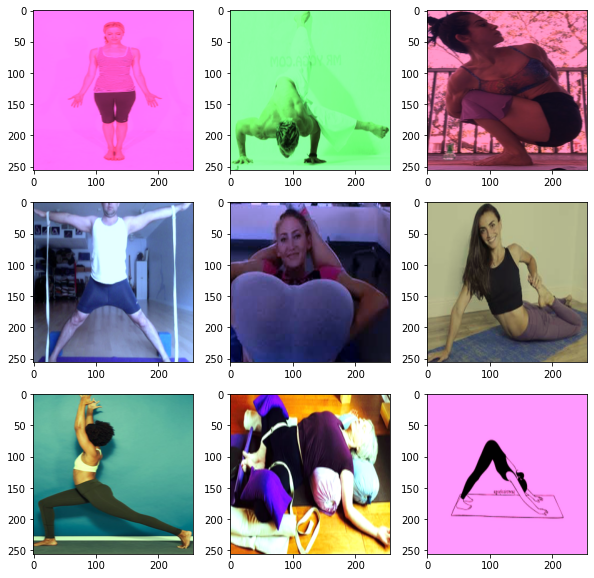

In [5]:
#inspect train_ds

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

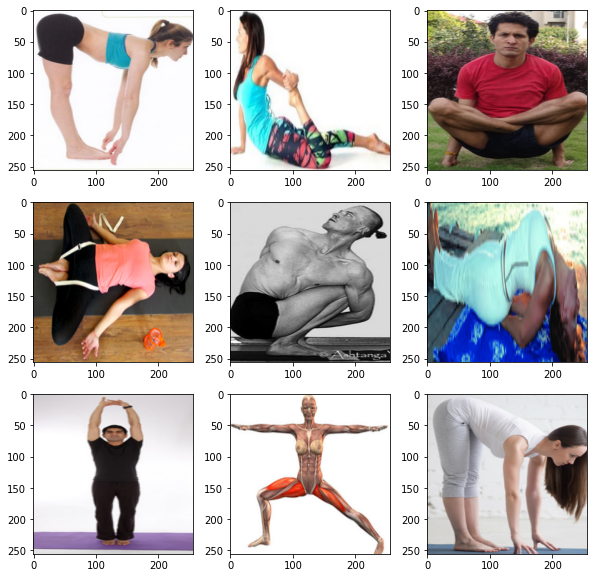

In [6]:
#inspect val_ds

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

In [7]:
resnet50 = resnet.resnet50_model(256)
resnet18 = resnet.resnet18_model(256)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           sequential_1[0][0]               
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        rescaling[0][0]                  
___________________________________________________________________________________________

In [8]:
resnet50.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

resnet18.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
resnet50.fit(train_ds,
epochs=100,verbose=1, validation_data=val_ds,
callbacks=[tensorboard_callback])

Epoch 1/100
  1/150 [..............................] - ETA: 0s - loss: 5.7456 - accuracy: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
150/150 [==============================] - 36s 243ms/step - loss: 3.9452 - accuracy: 0.1900 - val_loss: 6.6136 - val_accuracy: 0.0092
Epoch 2/100
 59/150 [==========>...................] - ETA: 16s - loss: 2.3311 - accuracy: 0.4052

KeyboardInterrupt: 

In [ ]:
resnet18.fit(train_ds,
epochs=200,verbose=1, validation_data=val_ds,
callbacks=[tensorboard_callback])

Epoch 1/200
  1/150 [..............................] - ETA: 0s - loss: 5.8102 - accuracy: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
150/150 [==============================] - 32s 211ms/step - loss: 4.9687 - accuracy: 0.0330 - val_loss: 4.9159 - val_accuracy: 0.0326
Epoch 2/200
150/150 [==============================] - 30s 199ms/step - loss: 4.0593 - accuracy: 0.1084 - val_loss: 6.3444 - val_accuracy: 0.0476
Epoch 3/200
150/150 [==============================] - 31s 205ms/step - loss: 3.4807 - accuracy: 0.1898 - val_loss: 3.9093 - val_accuracy: 0.1352
Epoch 4/200
150/150 [==============================] - 30s 198ms/step - loss: 2.9899 - accuracy: 0.2703 - val_loss: 3.6635 - val_accuracy: 0.2129
Epoch 5/200
150/150 [=============================